# Analysing the Performance of LSTM

Actutally, we only aim to visualize the overfitting/underfitting problem encountered during traing LSTM. 
For Assistments data, it seems way too easy to overfit, while for synthetic data, it doesn't seem to converge at all (even trained with 300 epoch, it still doesn't overfit).

In [62]:
import pandas as pd
# Read in file: metrics is a list of metrics' names
def read_performance_log(file_path, metrics):
    performance = file(file_path)
    
    line_cnt = 0
    num_metrics = len(metrics)
    log_matrix = []
    for line in performance:
        line = line.split()
        if line_cnt % num_metrics == 0:
            log_matrix.append([line_cnt / num_metrics])
        log_matrix[-1].append(float(line[-1]))
        line_cnt += 1
    
    df = pd.DataFrame(log_matrix, columns=['epoch'] + metrics)
    
    return df

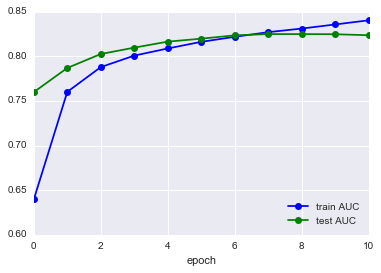

In [70]:
# plot training log
%matplotlib inline
import matplotlib.pyplot as plt

log = read_performance_log('Assistments/test_prediction_result_set_10/performance.txt', 
                           ['loss', 'train AUC', 'test AUC'])

plt.plot(log['epoch'], log['train AUC'], '-ob', label='train AUC')
plt.plot(log['epoch'], log['test AUC'], '-og', label='test AUC')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

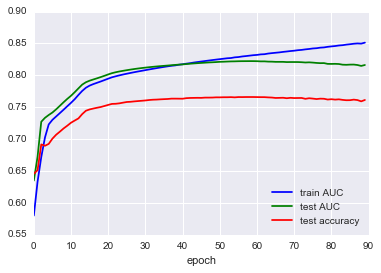

In [64]:
log = read_performance_log('Assistments/test_prediction_save_set_11/performance.txt', 
                           ['loss', 'train AUC', 'test AUC', 'test accuracy'])

plt.plot(log['epoch'], log['train AUC'], '-b', label='train AUC')
plt.plot(log['epoch'], log['test AUC'], '-g', label='test AUC')
plt.plot(log['epoch'], log['test accuracy'], '-r', label='test accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

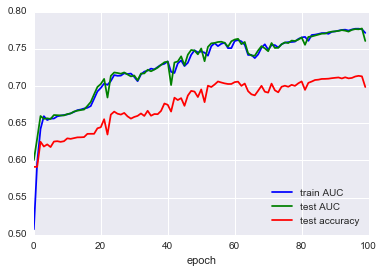

In [65]:
log = read_performance_log('synthetic/save_during_dataset2_paraset1/performance.txt', 
                           ['loss', 'train AUC', 'test AUC', 'test accuracy'])

plt.plot(log['epoch'], log['train AUC'], '-b', label='train AUC')
plt.plot(log['epoch'], log['test AUC'], '-g', label='test AUC')
plt.plot(log['epoch'], log['test accuracy'], '-r', label='test accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

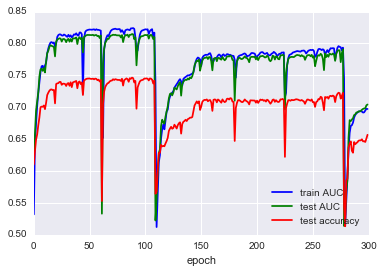

In [81]:
log = read_performance_log('synthetic/save_during_dataset9_paraset5/performance.txt', 
                           ['loss', 'train AUC', 'test AUC', 'test accuracy'])
plt.plot(log['epoch'], log['train AUC'], '-b', label='train AUC')
plt.plot(log['epoch'], log['test AUC'], '-g', label='test AUC')
plt.plot(log['epoch'], log['test accuracy'], '-r', label='test accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

This is weird, like super weird. Maybe the best way to see why is to print out the exact value of everything when the sudden drop happens. It could be the optimizer, or it's just we accidentally stepped off a cliff. Maybe we should:

* Try recreate the bug on a smaller dataset.
* See if it still happens when we have the same setting of everything, but on a different dataset.
* See if it still happens when we tune back the learning rate and see what happens when we train it for like 4000 epochs.

After trained with 5000 epochs, we can see the oscillation still happens but becomes more stable when trained with more epochs. I would blame the data for this.\

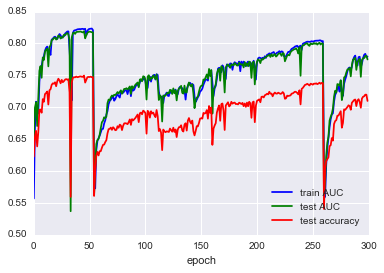

In [72]:
# turn down the clipping to 1.2
# and accidentally more training data, which should be a good thing, but ...
log = read_performance_log('synthetic/save_during_dataset9_paraset6/performance.txt', 
                           ['loss', 'train AUC', 'test AUC', 'test accuracy'])
plt.plot(log['epoch'], log['train AUC'], '-b', label='train AUC')
plt.plot(log['epoch'], log['test AUC'], '-g', label='test AUC')
plt.plot(log['epoch'], log['test accuracy'], '-r', label='test accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

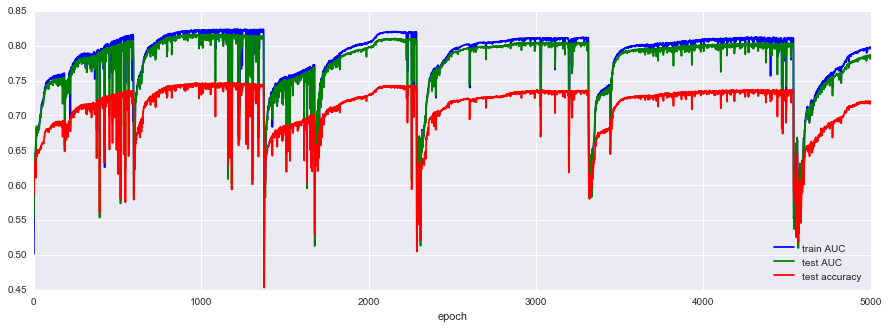

In [79]:
plt.figure(figsize=(15, 5))
log = read_performance_log('synthetic/save_during_dataset9_paraset7/performance.txt', 
                           ['loss', 'train AUC', 'test AUC', 'test accuracy'])
plt.plot(log['epoch'], log['train AUC'], '-b', label='train AUC')
plt.plot(log['epoch'], log['test AUC'], '-g', label='test AUC')
plt.plot(log['epoch'], log['test accuracy'], '-r', label='test accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

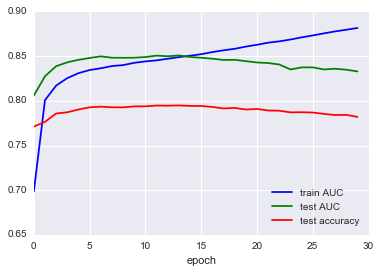

In [71]:
# result using the "dirty" data
log = read_performance_log('Assistments/saving_during_set14/performance.txt', 
                           ['loss', 'train AUC', 'test AUC', 'test accuracy'])
plt.plot(log['epoch'], log['train AUC'], '-b', label='train AUC')
plt.plot(log['epoch'], log['test AUC'], '-g', label='test AUC')
plt.plot(log['epoch'], log['test accuracy'], '-r', label='test accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()